Questo è il codice che include il lavoro fatto sulle basi del lab meeting tenuto in data 02 05 22


In [1]:
# carico i modelli dalla mia repository

def get_dbn_library():
  files = ["RBM.py", "Linear_model_tf.py"]
  repository_url = "https://raw.githubusercontent.com/LorenzoTausani/DBN/master/"
  for file in files:
    ! wget -O {file} {repository_url}{file}

get_dbn_library()

import RBM
import Linear_model_tf

--2022-05-06 23:49:13--  https://raw.githubusercontent.com/LorenzoTausani/DBN/master/RBM.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13497 (13K) [text/plain]
Saving to: ‘RBM.py’

RBM.py              100%[===================>]  13.18K  --.-KB/s    in 0s      

2022-05-06 23:49:13 (51.0 MB/s) - ‘RBM.py’ saved [13497/13497]

--2022-05-06 23:49:13--  https://raw.githubusercontent.com/LorenzoTausani/DBN/master/Linear_model_tf.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 272 [text/plain]
Saving to: ‘Linear_model_tf.py’

Lin

In [2]:
# Importing the libraries
#from RBM_Padella2 import RBM
from Linear_model_tf import LinearClassifier

from RBM import RBM

import torch 
import torchvision
from torchvision import datasets,transforms
from torch.utils.data import Dataset,DataLoader

import matplotlib
import matplotlib.pyplot as plt

import math
import numpy as np
import os
import random

import time

In [ ]:
'''
TO RETRIEVE TRAINED MODELS FROM GDRIVE

The cell will return the following and your needs to go 
to the link to retrieve the authorization code. Then you are good to go!
'''

from google.colab import drive
drive.mount('/content/gdrive')

In [ ]:
def seed_everything(seed=42):
    """Seed everything to make the code more reproducable.

    This code is the same as that found from many public Kaggle kernels.

    Parameters
    ----------
    seed: int
        seed value to ues

    """
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.backends.cudnn.deterministic = True

In [3]:
#device in use
DEVICE = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device {DEVICE}")

Using device cuda


  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ../data/MNIST/raw/train-images-idx3-ubyte.gz to ../data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ../data/MNIST/raw/train-labels-idx1-ubyte.gz to ../data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ../data/MNIST/raw/t10k-images-idx3-ubyte.gz to ../data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ../data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ../data/MNIST/raw

The number shown is the number: 2


/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:75: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")
/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:65: UserWarning: train_labels has been renamed targets
  warnings.warn("train_labels has been renamed targets")


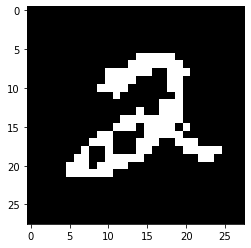

In [4]:
#importo dati mnist e binarizzo

#Loading MNIST dataset
mnist_data = datasets.MNIST('../data', train=True, download=True,
                    transform=transforms.Compose(
                    [transforms.ToTensor(),transforms.Normalize((0.1307,), (0.3081,))]))

mnist_data.data = (mnist_data.data.type(torch.FloatTensor)/255).bernoulli()
#https://stackoverflow.com/questions/68056122/attributeerror-cant-set-attribute-in-splitting-mnist-dataset

#Lets us visualize a number from the data set
idx = 5
img = mnist_data.train_data[idx]
print("The number shown is the number: {}".format(mnist_data.train_labels[idx]) )
plt.imshow(img , cmap = 'gray')
plt.show()

In [5]:
rbm_mnist = RBM(visible_units=28*28 ,
              hidden_units= 23*23 ,
              k = 5,
              learning_rate = 0.01,
              learning_rate_decay = True,
              xavier_init = True,
              increase_to_cd_k = False,
              use_gpu = False) #nota: use_gpu ora e useless

In [6]:
#dbn_mnist.train_static(mnist_data.data,mnist_data.train_labels,num_epochs , batch_size)
tmp = mnist_data.data
train_labels = mnist_data.train_labels

batch_size = 50
num_epochs = 20


tensor_x = tmp.type(torch.FloatTensor).to(DEVICE) # transform to torch tensors
tensor_y = train_labels.type(torch.FloatTensor).to(DEVICE)
_dataset = torch.utils.data.TensorDataset(tensor_x,tensor_y) # create your datset
_dataloader = torch.utils.data.DataLoader(_dataset,batch_size=batch_size,drop_last = True) # create your dataloader


start = time.time()

Avg_cost, Std_cost = rbm_mnist.train( _dataloader , num_epochs, batch_size)

end = time.time()

print(end - start)



/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:65: UserWarning: train_labels has been renamed targets
  warnings.warn("train_labels has been renamed targets")


RBM fitting: 1200it [00:06, 171.44it/s]
Epoch:1 ,avg_cost = 3.6006550788879395 ,std_cost = 0.6282638907432556 ,avg_grad = 7516.52685546875 ,std_grad = 3058.78564453125
RBM fitting: 1200it [00:05, 205.41it/s]
Epoch:2 ,avg_cost = 2.9547743797302246 ,std_cost = 0.17744556069374084 ,avg_grad = 6219.0166015625 ,std_grad = 328.9150695800781
RBM fitting: 1200it [00:05, 206.79it/s]
Epoch:3 ,avg_cost = 2.8149821758270264 ,std_cost = 0.16302230954170227 ,avg_grad = 6013.7578125 ,std_grad = 307.8533630371094
RBM fitting: 1200it [00:05, 205.44it/s]
Epoch:4 ,avg_cost = 2.7476966381073 ,std_cost = 0.1595550775527954 ,avg_grad = 5910.0341796875 ,std_grad = 298.0166320800781
RBM fitting: 1200it [00:06, 196.44it/s]
Epoch:5 ,avg_cost = 2.699718475341797 ,std_cost = 0.15742525458335876 ,avg_grad = 5842.86279296875 ,std_grad = 297.41180419921875
RBM fitting: 1200it [00:06, 183.32it/s]
Epoch:6 ,avg_cost = 2.664156675338745 ,std_cost = 0.15742313861846924 ,avg_grad = 5796.130859375 ,std_grad = 287.344573974

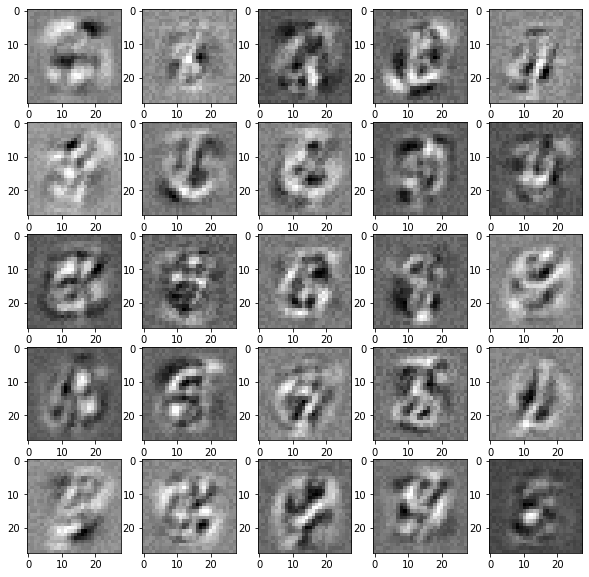

In [ ]:
# visualising layer 1
learned_weights = rbm_mnist.W.cpu().transpose(0,1).numpy()
plt.show()
fig = plt.figure(3, figsize=(10,10))
for i in range(25): 
    sub = fig.add_subplot(5, 5, i+1)
    sub.imshow(learned_weights[i,:].reshape((28,28)), cmap=plt.cm.gray)
plt.show()

/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:75: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")
/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:65: UserWarning: train_labels has been renamed targets
  warnings.warn("train_labels has been renamed targets")


<class 'torch.Tensor'>
The original number: 1


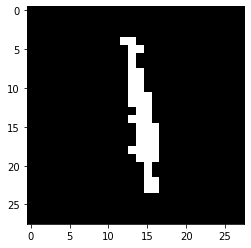

The reconstructed image


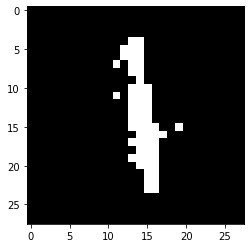

In [ ]:
#recostruction check

idx = random.randint(0,len(mnist_data.train_data))
img = mnist_data.train_data[idx]
lbl = mnist_data.train_labels[idx]
reconstructed_img = img.view(1,-1).type(torch.FloatTensor)

_,reconstructed_img= rbm_mnist.reconstruct(reconstructed_img,1)

print(type(lbl))

reconstructed_img = reconstructed_img.view((28,28)).cpu()
print("The original number: {}".format(lbl))
plt.imshow(img , cmap = 'gray')
plt.show()
print("The reconstructed image")
plt.imshow(reconstructed_img , cmap = 'gray')
plt.show()

In [7]:
rbm_mnist.create_h_tran_test_set(mnist_data.train_data, mnist_data.train_labels , nr_train_el=48000, nr_test_el=12000)

/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:75: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")
/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:65: UserWarning: train_labels has been renamed targets
  warnings.warn("train_labels has been renamed targets")


In [10]:
rbm_mnist.train_h_Linear_classifier(nr_epochs=10, Lr=0.01)

Epoch: 0, loss: 0.37418484412288916
Epoch: 1, loss: 0.3698609864028792
Epoch: 2, loss: 0.36610264393966646
Epoch: 3, loss: 0.36274378893431275
Epoch: 4, loss: 0.3596563081722707
Epoch: 5, loss: 0.3568732724292204
Epoch: 6, loss: 0.354354248327824
Epoch: 7, loss: 0.35210147958714516
Epoch: 8, loss: 0.3500237678643316
Epoch: 9, loss: 0.34786252507474275


[0.37418484412288916,
 0.3698609864028792,
 0.36610264393966646,
 0.36274378893431275,
 0.3596563081722707,
 0.3568732724292204,
 0.354354248327824,
 0.35210147958714516,
 0.3500237678643316,
 0.34786252507474275]

In [11]:
rbm_mnist.test_h_Linear_classifier()

88.1